# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fix the file path - /content/ is for Google Colab, not Linux
try:
    df = pd.read_csv('DatasetAfricaMalaria.csv')  # Look in current directory
    print("Using actual malaria dataset")
    print("Dataset shape:", df.shape)
    print("Dataset columns:", df.columns.tolist())
    print("First few rows:")
    print(df.head())
    
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print("Numeric columns:", numeric_cols.tolist())
    
    if len(numeric_cols) > 0:
        # Get numeric data and handle missing values
        numeric_data = df[numeric_cols]
        print("Missing values per column:")
        print(numeric_data.isnull().sum())
        
        # Drop columns with too many missing values (>50% missing)
        threshold = len(numeric_data) * 0.5
        numeric_data = numeric_data.dropna(axis=1, thresh=threshold)
        print("Columns after dropping those with >50% missing:", numeric_data.columns.tolist())
        
        # Fill remaining missing values with column means
        numeric_data = numeric_data.fillna(numeric_data.mean())
        
        # Convert to numpy array
        data = numeric_data.values
        print("Using cleaned numeric data with shape:", data.shape)
    else:
        print("No numeric columns found, using random data")
        data = np.random.rand(100, 10)
        
except FileNotFoundError:
    print("Dataset not found, using random data")
    data = np.random.rand(100, 10)

# Step 1: Load and Standardize the data (use of numpy only allowed)
print("Data type:", type(data))
print("Data shape:", data.shape)
print("Sample data (first 2 rows):", data[:2])

# Check for any remaining NaN values
if np.isnan(data).any():
    print("Warning: Data still contains NaN values. Using random data instead.")
    data = np.random.rand(100, 10)

mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

# Avoid division by zero for constant columns
std_dev[std_dev == 0] = 1

standardized_data = (data - mean) / std_dev

print("Standardized data shape:", standardized_data.shape)
standardized_data[:5]  # Display the first few rows of standardized data

Matplotlib is building the font cache; this may take a moment.


Using actual malaria dataset
Dataset shape: (594, 27)
Dataset columns: ['Country Name', 'Year', 'Country Code', 'Incidence of malaria (per 1,000 population at risk)', 'Malaria cases reported', 'Use of insecticide-treated bed nets (% of under-5 population)', 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', 'People using safely managed drinking water services (% of population)', 'People using safely managed drinking water services, rural (% of rural population)', 'People using safely managed drinking water services, urban (% of urban population)', 'People using safely managed sanitation services (% of population)', 'People using safely managed sanitation services, rural (% of rural population)', 'People using safely managed sanitation services, urban  (% of urban population)', 'Rural population (% of total population)', 'Rural population growth (annual %)', '

array([[-1.58113883, -1.21256459, -0.50676022, -1.23400095, -1.66809102,
         1.23397271, -0.56164688,  1.4949511 ,  1.86242385,  1.15800583,
         1.77365688,  2.08348956,  1.99788845,  1.60900436, -0.78319128],
       [-1.58113883,  0.61644942,  0.22065066, -0.79850359,  0.43654858,
         0.79847029,  1.02714839, -1.04968763, -1.49943184, -2.0312881 ,
        -0.08450631, -0.60024644,  0.2987136 , -0.89572088,  0.02653472],
       [-1.58113883,  1.85097486, -0.50677256,  0.08917686,  0.50362873,
        -0.08922047,  0.39163028, -0.12891488,  0.18799653, -0.88446427,
        -1.05813946, -1.01427689, -1.20999189,  0.41358982, -0.75042082],
       [-1.58113883, -1.20605768, -0.50658756, -0.82130741, -2.37243257,
         0.82127437,  0.88208447,  0.75053369,  0.33317496,  1.11063462,
         0.84629616,  0.50795659,  1.37380734, -1.6059517 ,  0.36666905],
       [-1.58113883,  2.00127157, -0.48578404,  1.12146692,  0.64617404,
        -1.12152249,  1.64885089, -0.79883234, 

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [2]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.00168634e+00, -6.80542806e-02,  3.57947203e-01,
        -8.40379544e-02, -4.97357957e-02,  8.40398632e-02,
        -5.65317141e-02,  1.18565745e-01,  1.10879038e-01,
         1.00777429e-01,  6.83801684e-02,  6.84030302e-02,
         5.87010243e-02, -3.74442841e-19,  4.49331410e-18],
       [-6.80542806e-02,  1.00168634e+00,  2.88995393e-01,
         2.45446793e-01,  3.87139217e-01, -2.45450290e-01,
         3.09619690e-01, -3.68912526e-01, -3.13484257e-01,
        -3.99015433e-01, -4.40983873e-01, -3.75800980e-01,
        -4.25948448e-01,  5.88013289e-02, -2.64875225e-01],
       [ 3.57947203e-01,  2.88995393e-01,  1.00168634e+00,
         2.13337373e-01,  2.40234419e-01, -2.13346062e-01,
         2.52430491e-01, -2.32449030e-01, -1.80609519e-01,
        -1.67590337e-01, -1.75105836e-01, -1.14344867e-01,
        -2.08589045e-01, -8.65447283e-02,  6.68523086e-02],
       [-8.40379544e-02,  2.45446793e-01,  2.13337373e-01,
         1.00168634e+00,  6.52752199e-01, -1.00168633

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)
print("\nFirst 5 eigenvalues:", eigenvalues[:5])
print("\nSum of eigenvalues:", np.sum(eigenvalues))

# Display eigenvalues and eigenvectors
print("\nAll eigenvalues:")
print(eigenvalues)
print("\nFirst eigenvector (first column):")
print(eigenvectors[:, 0])

Eigenvalues shape: (15,)
Eigenvectors shape: (15, 15)

First 5 eigenvalues: [6.2489601  2.09993394 1.40291838 1.29046911 0.91731973]

Sum of eigenvalues: 15.025295109612145

All eigenvalues:
[6.24896010e+00 2.09993394e+00 1.40291838e+00 1.29046911e+00
 9.17319734e-01 7.77600782e-01 6.88783856e-01 4.44106672e-01
 3.95882479e-01 2.79563432e-01 2.30392990e-01 1.36760579e-01
 1.05172403e-01 7.43064073e-03 1.06920889e-08]

First eigenvector (first column):
[-0.04115818  0.21139413  0.12435414  0.26944407  0.27741746 -0.26944545
  0.23643106 -0.36886937 -0.31601301 -0.29268206 -0.35286278 -0.3180819
 -0.3319571  -0.03987557  0.03206369]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [4]:
# Step 5: Sort Principal Components
# Get indices that would sort eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

print("Sorted eigenvalues (descending order):")
print(sorted_eigenvalues)

# Calculate explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("\nExplained variance ratio:")
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative explained variance:")
print(cumulative_variance)

# Select number of components (e.g., first 2 or 3)
n_components = 3
selected_eigenvectors = sorted_eigenvectors[:, :n_components]
print(f"\nSelected {n_components} principal components")
print("Selected eigenvectors shape:", selected_eigenvectors.shape)
print(f"Explained variance with {n_components} components: {cumulative_variance[n_components-1]:.4f}")

Sorted eigenvalues (descending order):
[6.24896010e+00 2.09993394e+00 1.40291838e+00 1.29046911e+00
 9.17319734e-01 7.77600782e-01 6.88783856e-01 4.44106672e-01
 3.95882479e-01 2.79563432e-01 2.30392990e-01 1.36760579e-01
 1.05172403e-01 7.43064073e-03 1.06920889e-08]

Explained variance ratio:
[4.15895998e-01 1.39759913e-01 9.33704374e-02 8.58864404e-02
 6.10516950e-02 5.17527793e-02 4.58416191e-02 2.95572678e-02
 2.63477340e-02 1.86061858e-02 1.53336749e-02 9.10202281e-03
 6.99968967e-03 4.94542082e-04 7.11605919e-10]

Cumulative explained variance:
[0.415896   0.55565591 0.64902635 0.73491279 0.79596448 0.84771726
 0.89355888 0.92311615 0.94946388 0.96807007 0.98340374 0.99250577
 0.99950546 1.         1.        ]

Selected 3 principal components
Selected eigenvectors shape: (15, 3)
Explained variance with 3 components: 0.6490


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [5]:
# Step 6: Project Data onto Principal Components
# Project the standardized data onto the selected principal components
projected_data = np.dot(standardized_data, selected_eigenvectors)

print("Original data shape:", standardized_data.shape)
print("Projected data shape:", projected_data.shape)
print("\nFirst 5 rows of projected data:")
print(projected_data[:5])

# Display some statistics
print(f"\nProjected data statistics:")
print(f"Mean of projected data: {np.mean(projected_data, axis=0)}")
print(f"Std of projected data: {np.std(projected_data, axis=0)}")

Original data shape: (594, 15)
Projected data shape: (594, 3)

First 5 rows of projected data:
[[-5.03478331  0.8134073   0.48809336]
 [ 1.77020306  1.23366215  1.49625858]
 [ 1.97784333  1.46808517  0.687551  ]
 [-2.69270776 -0.32940033  1.96021261]
 [ 2.85291137  0.93583042  0.30139282]]

Projected data statistics:
Mean of projected data: [1.18498552e-16 4.28015274e-16 1.12330646e-16]
Std of projected data: [2.49768692 1.44789457 1.18345112]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [6]:
print("=== PCA RESULTS SUMMARY ===")
print(f"Original dataset: {standardized_data.shape[0]} samples × {standardized_data.shape[1]} features")
print(f"Reduced dataset: {projected_data.shape[0]} samples × {projected_data.shape[1]} components")
print(f"Dimensionality reduction: {standardized_data.shape[1]} → {projected_data.shape[1]} features")
print(f"Variance retained: {cumulative_variance[n_components-1]:.4f} ({cumulative_variance[n_components-1]*100:.2f}%)")

print("\n=== REDUCED DATASET (First 10 rows) ===")
# Create a DataFrame for better display
import pandas as pd
columns = [f'PC{i+1}' for i in range(n_components)]
reduced_df = pd.DataFrame(projected_data[:10], columns=columns)
print(reduced_df)

print("\n=== PRINCIPAL COMPONENTS IMPORTANCE ===")
for i in range(n_components):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}% of variance)")


=== PCA RESULTS SUMMARY ===
Original dataset: 594 samples × 15 features
Reduced dataset: 594 samples × 3 components
Dimensionality reduction: 15 → 3 features
Variance retained: 0.6490 (64.90%)

=== REDUCED DATASET (First 10 rows) ===
        PC1       PC2       PC3
0 -5.034783  0.813407  0.488093
1  1.770203  1.233662  1.496259
2  1.977843  1.468085  0.687551
3 -2.692708 -0.329400  1.960213
4  2.852911  0.935830  0.301393
5  1.860798 -2.086911  0.253969
6 -2.916574  1.708101  0.971811
7  0.542548  1.070676  1.001379
8  1.990016  0.619851  1.289943
9  3.291985 -0.120392  1.231659

=== PRINCIPAL COMPONENTS IMPORTANCE ===
PC1: 0.4159 (41.59% of variance)
PC2: 0.1398 (13.98% of variance)
PC3: 0.0934 (9.34% of variance)


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

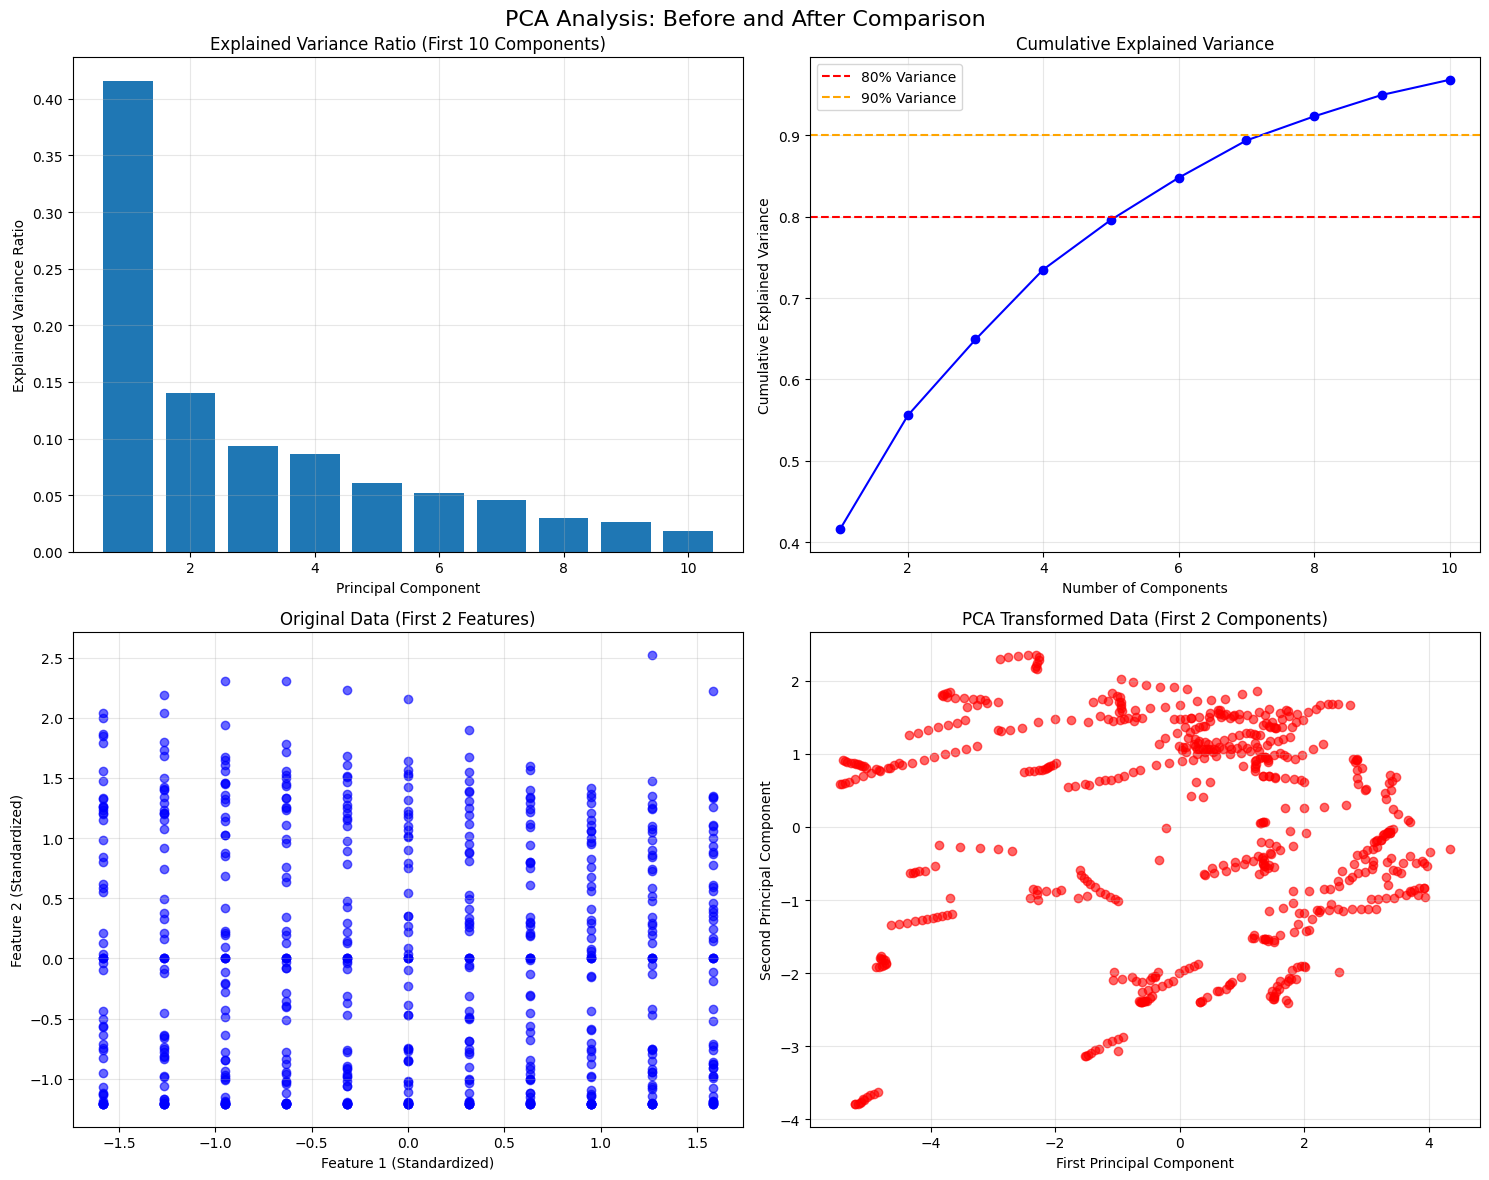

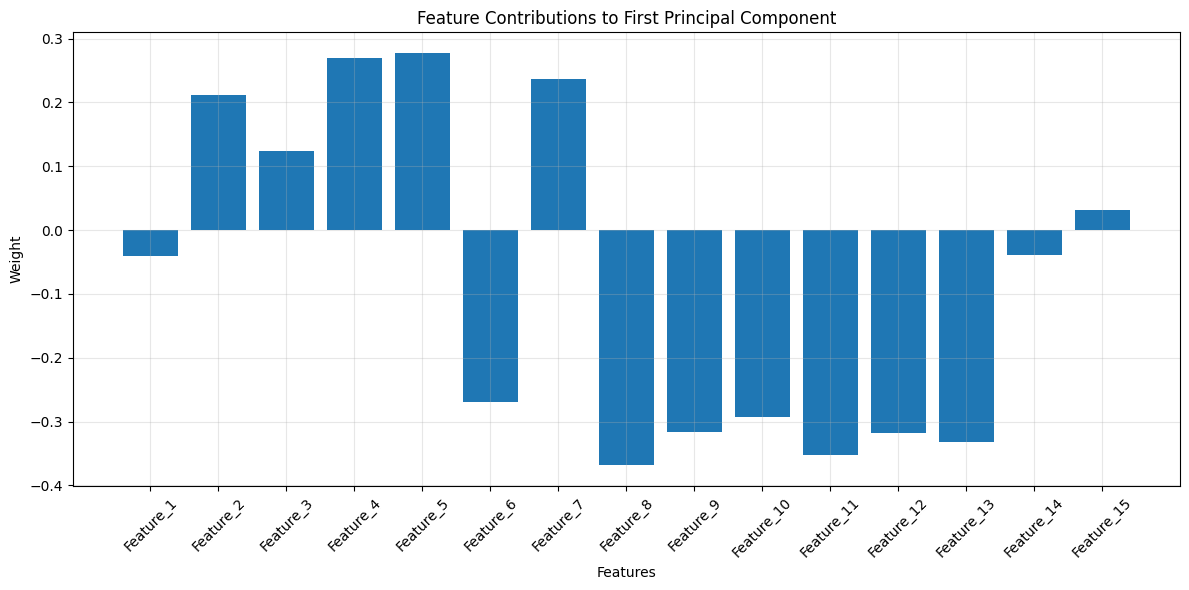

PCA Analysis Complete! ✅


In [7]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('PCA Analysis: Before and After Comparison', fontsize=16)

# Plot 1: Explained Variance Ratio
axes[0,0].bar(range(1, len(explained_variance_ratio[:10])+1), explained_variance_ratio[:10])
axes[0,0].set_title('Explained Variance Ratio (First 10 Components)')
axes[0,0].set_xlabel('Principal Component')
axes[0,0].set_ylabel('Explained Variance Ratio')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Cumulative Explained Variance
axes[0,1].plot(range(1, len(cumulative_variance[:10])+1), cumulative_variance[:10], 'bo-')
axes[0,1].axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
axes[0,1].axhline(y=0.9, color='orange', linestyle='--', label='90% Variance')
axes[0,1].set_title('Cumulative Explained Variance')
axes[0,1].set_xlabel('Number of Components')
axes[0,1].set_ylabel('Cumulative Explained Variance')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Original Data (first 2 features)
axes[1,0].scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.6, c='blue')
axes[1,0].set_title('Original Data (First 2 Features)')
axes[1,0].set_xlabel('Feature 1 (Standardized)')
axes[1,0].set_ylabel('Feature 2 (Standardized)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: PCA Transformed Data (first 2 components)
axes[1,1].scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.6, c='red')
axes[1,1].set_title('PCA Transformed Data (First 2 Components)')
axes[1,1].set_xlabel('First Principal Component')
axes[1,1].set_ylabel('Second Principal Component')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualization: Feature importance in first PC
plt.figure(figsize=(12, 6))
feature_names = [f'Feature_{i+1}' for i in range(len(selected_eigenvectors[:, 0]))]
plt.bar(feature_names, selected_eigenvectors[:, 0])
plt.title('Feature Contributions to First Principal Component')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("PCA Analysis Complete! ✅")
